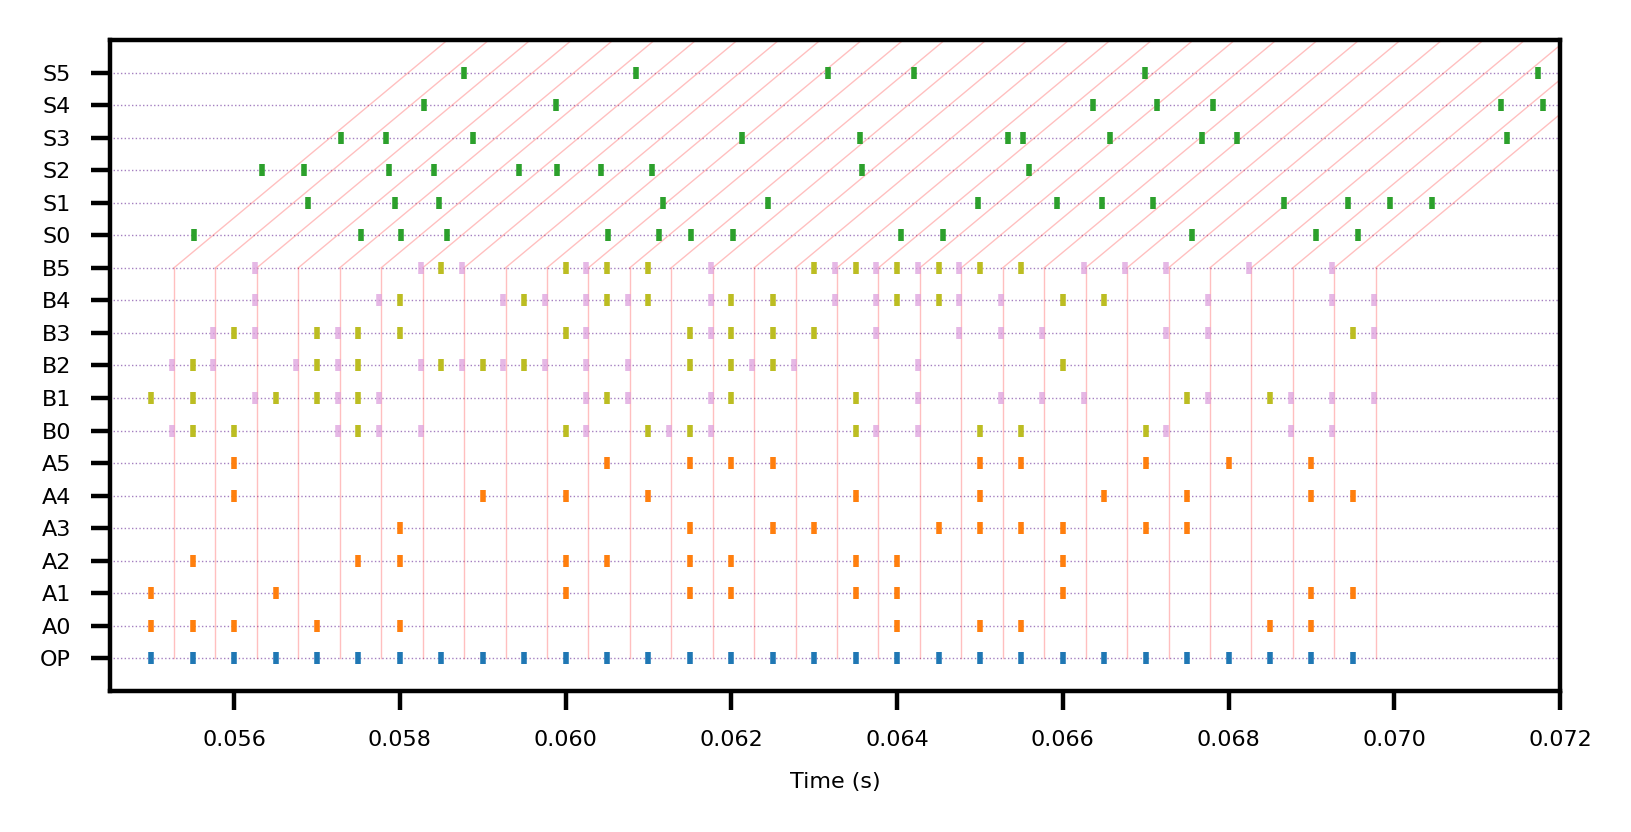

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

filename = "adder_2_inputs_6bits_factor2_1"
folder = "results_ADDER/"

with open(folder + filename + '.pickle', "rb") as handle:
        sg_times, evts_n = pickle.load(handle)

n_bits = 6
factor = 2
show_lines = True
show_res = True

# ---------------------------------------------------------------

plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = '4'
plt.rcParams["figure.figsize"] = (4, 0.5 * ((5 + 3 * (n_bits - 1)) / 5))  # 5 <- 1 per bit (A, B, S) + 1 extra above + 1 extra below

# Lines
if show_lines:
    plt.hlines(range(-1, 3 * n_bits + 1), 0, sg_times[0][-3] + 0.005 / factor, linestyles='dotted', linewidth=0.25, color='indigo', alpha=0.5)

    for i in sg_times[0]:
        plt.plot([i + 0.00055 / factor, i + 0.00055 / factor + 0.00055 * n_bits], [2 * n_bits - 1, 3 * n_bits], linestyle='-', linewidth=0.25, color='red', alpha=0.25)
        plt.plot([i + 0.00055 / factor, i + 0.00055 / factor], [-1, 2 * n_bits - 1], linestyle='-', linewidth=0.25, color='red', alpha=0.25)
# ------

plt.plot(sg_times[0], [-1] * len(sg_times[0]), '|', markersize=2, color='tab:blue')
for i in range(n_bits):
    plt.plot(sg_times[i+1], [i] * len(sg_times[i+1]), '|', markersize=2, color='tab:orange')
    plt.plot(sg_times[i+1+n_bits], [i+n_bits] * len(sg_times[i+1+n_bits]), '|', markersize=2, color='tab:olive')

plt.xlabel('Time (s)')
plt.yticks(range(-1, n_bits * 3))
plt.gca().set_yticklabels(["OP"] + ["A" + str(i) for i in range(n_bits)] + ["B" + str(i) for i in range(n_bits)] + ["S" + str(i) for i in range(n_bits)])
plt.xlim([sg_times[0][0] - 0.001 / factor, sg_times[0][-3] + 0.005 / factor])
plt.ylim([-2, n_bits * 3])

s0_index = n_bits * 2 + 1 
if n_bits > 1:
    s0_index = s0_index + 5 * (n_bits - 1) 
else:
    s0_index = s0_index + 1
     
for i in range(n_bits - 1):
    s0_index = s0_index + (2 + 5 * i) * 2

s0_index = s0_index + 6

evts_ha = np.array([evt for evt in evts_n if evt[1] == s0_index])
if len(evts_ha) != 0:
    plt.plot(evts_ha[:,0], [n_bits * 2] * len(evts_ha[:,0]), '|', markersize=2, color='tab:green')

for i in range(n_bits - 1):
    evts_tmp = []
    for evt in evts_n:
        if evt[1] == s0_index + 18 * (i + 1):
            evts_tmp.append(evt)

    evts_tmp = np.array(evts_tmp)
    if len(evts_tmp) != 0:
        plt.plot(evts_tmp[:,0], [n_bits * 2 + 1 + i] * len(evts_tmp[:,0]), '|', markersize=2, color='tab:green')

# --- COMPARING RESULTS ---
if show_res:
    for t in sg_times[0][0:len(sg_times[0])-2]:
        sum = 0
        for i in range(1, n_bits + 1):
            if t in sg_times[i]:
                sum += 2 ** (i - 1)
            if t in sg_times[i + n_bits]:
                sum += 2 ** (i - 1)
        sum_bin = format(sum, "0" + str(n_bits) + "b")[::-1]

        for i in range(n_bits):
            if sum_bin[i] == '1':
                plt.plot(t + 0.001 / (2 * factor), n_bits + i, '|', markersize=2, color='plum', alpha=0.75)

plt.tight_layout()
plt.savefig(folder + filename + '.png', transparent=False, facecolor='white', edgecolor='black')